# Treinamento com interface de alto nível

O objetivo deste notebook é treinar uma rede usando a metodologia de treinamento de alto nível.

## Importação das bibliotecas

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

import lib.pytorch_trainer as ptt

## Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos 500 amostras de treinamento e 100 amostras de validação.

In [5]:
dataset_dir = '/data/datasets/MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')
x_test,  y_test  = torch.load(dataset_dir + 'processed/test.pt')

x_train = x_train.float()
x_test = x_test.float()

x_train = x_train / 255.
x_test = x_test / 255.

if True:
    n_samples_train = 1000
    n_samples_test  = 500

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]
    x_test  = x_test[:n_samples_test]
    y_test  = y_test[:n_samples_test]

## Visualizando os dados

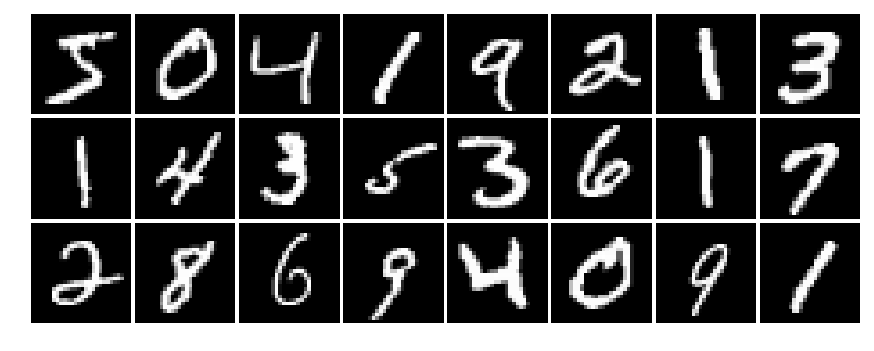

In [6]:
N = 24
grid = torchvision.utils.make_grid(x_train[:N].unsqueeze(1), normalize=True, pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')
plt.show()

## Criação da rede

In [8]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x
    
model = Model()
model

Model (
  (fc1): Linear (784 -> 50)
  (fc2): Linear (50 -> 10)
)

## Treinamento

In [9]:
def compute_accuracy(logits, labels):
    _, preds = torch.max(logits.data, 1)
    return (preds == labels.data).type(torch.FloatTensor).mean()

In [10]:
trainer = ptt.DeepNetTrainer(model,
                        criterion = nn.CrossEntropyLoss(),
                        optimizer = torch.optim.SGD(model.parameters(),lr=0.01),
                        metrics   = dict(acc=compute_accuracy), 
                        #callbacks = [ptt.PrintCallback()]
                        )

In [11]:
trainer.fit(10, x_train, y_train)

## Avaliando a acurácia tanto no conjunto de treinamento como no conjunto de validação

In [12]:
val = trainer.evaluate(x_train,y_train)

evaluate: 99/99 ok


In [13]:
print('Training Accuracy:   {:f}'.format(val['acc']))

Training Accuracy:   0.884000


## Matriz de confusão com dados de treinamento e validação

In [14]:
y_pred = torch.max(trainer.predict(x_train),1)[1]

predict: 99/99 ok


In [15]:
pd.crosstab(y_pred.numpy(),y_train.numpy())

col_0   0    1   2   3   4   5   6    7   8   9
row_0                                          
0      94    0   1   1   0   0   1    0   0   2
1       0  110   6   0   1   1   2    4   1   0
2       0    0  81   0   1   2   2    0   2   0
3       0    0   2  78   0   6   0    0   2   1
4       0    0   1   1  95   2   0    3   0   4
5       2    2   0   7   1  73   0    0   3   2
6       1    0   2   1   2   4  88    0   1   1
7       0    1   5   1   0   0   0  107   0   8
8       0    3   1   3   0   2   1    0  76   0
9       0    0   0   1   5   2   0    3   2  82